# **Objective:**
### The objective of this project is to develop a comprehensive analytics dashboard for Innovant Telecom, enabling actionable insights into user demographics, behavioral patterns, and device properties. By leveraging data from millions of mobile devices active daily, the dashboard will empower Innovant Telecom's clients—advertisers, developers, and marketers—to craft personalized, data-driven strategies. This solution aims to enhance audience engagement and deliver highly relevant and impactful user experiences.

In [ ]:
import pandas as pd
import numpy as np

df_gender = pd.read_csv('/content/gender_age_train.csv')
df_phone = pd.read_csv('/content/phone_brand_device_model.csv')
df_events = pd.read_csv('/content/events_data.csv')

In [ ]:
# Converting the column values into positive numbers by abs, int is to convert it into digits
df_phone['device_id'] = df_phone['device_id'].apply(lambda x: abs(int(x)))

df_phone['device_id'] = df_phone['device_id'].astype(str)
df_phone['device_id'] = df_phone['device_id'].apply(lambda x: x[:10])

## **Considering Gender ownership as per Age groups**

In [ ]:
# Converting the column values into positive numbers by abs, int is to convert it into digits
df_gender['device_id'] = df_gender['device_id'].apply(lambda x: abs(int(x)))

df_gender['device_id'] = df_gender['device_id'].astype(str)
df_gender['device_id'] = df_gender['device_id'].apply(lambda x: x[:10])

In [ ]:
df_gender.head()

,device_id,gender,age,group
0,8076090000,M,35,M32-38
1,2897160000,M,35,M32-38
2,8260680000,M,35,M32-38
3,4938850000,M,30,M29-31
4,2451340000,M,30,M29-31


In [ ]:
df_gender.isnull().sum()

,0
device_id,0
gender,0
age,0
group,0


In [ ]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  object
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_gender.shape

(74645, 4)

In [ ]:
df_gender_grouped = df_gender.groupby('group').count().reset_index()
df_gender_grouped

,group,device_id,gender,age
0,F23-,5050,5050,5050
1,F24-26,4190,4190,4190
2,F27-28,3118,3118,3118
3,F29-32,4628,4628,4628
4,F33-42,5561,5561,5561
5,F43+,4194,4194,4194
6,M22-,7488,7488,7488
7,M23-26,9605,9605,9605
8,M27-28,5445,5445,5445
9,M29-31,7309,7309,7309


## **Devices owned by male of different ages**

In [ ]:
df_gender['age'].unique()

array([35, 30, 24, 36, 38, 33, 31, 37, 28, 32, 48, 75, 39, 25, 27, 29, 34,
       22, 26, 47, 44, 21, 42, 64, 46, 23, 20, 41, 43, 51, 49, 53, 59, 45,
       50, 70, 67, 19, 52, 40, 63, 60, 61, 78, 56, 65, 58, 17, 16, 18, 71,
       54, 76, 62, 73, 66, 55, 57, 83, 84, 81, 80, 79, 77, 74, 13, 68, 89,
       87, 69, 88, 72, 82, 90, 96, 15,  1, 12, 14, 10, 85, 86, 11,  6, 94])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_grouped_age_male = df_gender[df_gender['gender'] == 'M'].groupby('age')

df_grouped_age_male = df_grouped_age_male['age'].value_counts().reset_index()
df_grouped_age_male = df_grouped_age_male.sort_values('count', ascending=False).head(20)
df_grouped_age_male

,age,count
17,26,2920
18,27,2853
20,29,2788
19,28,2592
21,30,2507
16,25,2390
15,24,2281
14,23,2014
22,31,2014
13,22,1933


In [ ]:
unique_age = df_grouped_age_male['age'].unique()
len(unique_age)

20

In [ ]:
df_gender.head()

,device_id,gender,age,group
0,8076090000,M,35,M32-38
1,2897160000,M,35,M32-38
2,8260680000,M,35,M32-38
3,4938850000,M,30,M29-31
4,2451340000,M,30,M29-31


In [ ]:
df_gender['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_age_grouped_female = df_gender[df_gender['gender'] == 'F'].groupby('age')
df_age_grouped_female= df_age_grouped_female['age'].value_counts().reset_index()
df_age_grouped_female = df_age_grouped_female.sort_values('count', ascending= False).head(20)

In [ ]:
df_phone.shape

(87726, 3)

In [ ]:
df_phone.head()

,device_id,phone_brand,device_model
0,1877780000,vivo,Y13
1,3766090000,小米,V183
2,6238940000,OPPO,R7s
3,8973200000,三星,A368t
4,2015530000,小米,红米Note2


In [ ]:
df_phone.isnull().sum()

,0
device_id,0
phone_brand,0
device_model,0


In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  object
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


In [ ]:
# Remove leading and trailing spaces
df_phone['phone_brand'] = df_phone['phone_brand'].str.strip()

In [ ]:
df_phone['phone_brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [ ]:

#Converted all the brand names from chinese names to english translation wihtout changing the meaning. Used chatgpt for the translation part.

brands = {
    'vivo': 'Vivo',
    '小米': 'Xiaomi',
    'OPPO': 'OPPO',
    '三星': 'Samsung',
    '酷派': 'Coolpad',
    '联想': 'Lenovo',
    '华为': 'Huawei',
    '奇酷': 'Qiku',
    '魅族': 'Meizu',
    '斐讯': 'Phicomm',
    '中国移动': 'China Mobile',
    'HTC': 'HTC',
    '天语': 'K-Touch',
    '至尊宝': 'Zunbao',
    'LG': 'LG',
    '欧博信': 'Obeis',
    '优米': 'UMI',
    'ZUK': 'ZUK',
    '努比亚': 'Nubia',
    '惠普': 'HP',
    '尼比鲁': 'Nibiru',
    '美图': 'Meitu',
    '乡米': 'Xiaomi',
    '摩托罗拉': 'Motorola',
    '梦米': 'Mengmi',
    '锤子': 'Smartisan',
    '富可视': 'Infocus',
    '乐视': 'LeEco',
    '海信': 'Hisense',
    '百立丰': 'Bailifeng',
    '一加': 'OnePlus',
    '语信': 'Yusun',
    '海尔': 'Haier',
    '酷比': 'Koobee',
    '纽曼': 'Newsmy',
    '波导': 'Bird',
    '朵唯': 'Doov',
    '聆韵': 'Lingyun',
    'TCL': 'TCL',
    '酷珀': 'Cooper',
    '爱派尔': 'Apple',
    'LOGO': 'Logo',
    '青葱': 'Green Onion',
    '果米': 'Guomi',
    '华硕': 'Asus',
    '昂达': 'Onda',
    '艾优尼': 'IUNI',
    '康佳': 'Konka',
    '优购': 'Yougou',
    '邦华': 'Banghua',
    '赛博宇华': 'Cyber Yuhua',
    '黑米': 'Black Rice',
    'Lovme': 'Lovme',
    '先锋': 'Pioneer',
    'E派': 'Epie',
    '神舟': 'Hasee',
    '诺基亚': 'Nokia',
    '普耐尔': 'Ployer',
    '糖葫芦': 'Tanghulu',
    '亿通': 'Eton',
    '欧新': 'Ouxin',
    '米奇': 'Mickey',
    '酷比魔方': 'Cube',
    '蓝魔': 'Ramos',
    '小杨树': 'Little Poplar',
    '贝尔丰': 'Belfone',
    '糯米': 'Nuomi',
    '米歌': 'Mige',
    'E人E本': 'Erin E-Book',
    '西米': 'Ximi',
    '大Q': 'Big Q',
    '台电': 'Teclast',
    '飞利浦': 'Philips',
    '唯米': 'Weimi',
    '大显': 'Daxian',
    '长虹': 'Changhong',
    '维图': 'Vitu',
    '青橙': 'Orange',
    '本为': 'Benwei',
    '虾米': 'Shrimp Rice',
    '夏新': 'Amoi',
    '帷幄': 'Weiwo',
    '百加': 'Baja',
    'SUGAR': 'Sugar',
    '欧奇': 'OKI',
    '世纪星': 'Century Star',
    '智镁': 'Zhimai',
    '欧比': 'Obi',
    '基伍': 'GiONEE',
    '飞秒': 'Femtosecond',
    '德赛': 'Desay',
    '易派': 'EPI',
    '谷歌': 'Google',
    '金星数码': 'Venus Digital',
    '广信': 'Gionee',
    '诺亚信': 'Noain',
    'MIL': 'MIL',
    '白米': 'Baimi',
    '大可乐': 'Big Cola',
    '宝捷讯': 'Baojieshun',
    '优语': 'Youyu',
    '首云': 'Shouyun',
    '瑞米': 'Ruimi',
    '瑞高': 'Ruigao',
    '沃普丰': 'Wopophone',
    '摩乐': 'Mole',
    '鲜米': 'Xianmi',
    '凯利通': 'Kailitong',
    '唯比': 'Weibi',
    '欧沃': 'OWO',
    '丰米': 'Fengmi',
    '恒宇丰': 'Hengyufeng',
    '奥克斯': 'AUX',
    '西门子': 'Siemens',
    '欧乐迪': 'Olidi',
    'PPTV': 'PPTV'
}


In [ ]:
df_phone['phone_brand'] = df_phone['phone_brand'].map(brands)

In [ ]:
df_phone.isnull().sum()

,0
device_id,0
phone_brand,0
device_model,0


In [ ]:
df_phone.head()

,device_id,phone_brand,device_model
0,1877780000,Vivo,Y13
1,3766090000,Xiaomi,V183
2,6238940000,OPPO,R7s
3,8973200000,Samsung,A368t
4,2015530000,Xiaomi,红米Note2


In [ ]:
df_phone = df_phone.sort_values('device_id', ascending=True)
df_phone.head()

,device_id,phone_brand,device_model
67571,1000230000,Nubia,Z7 Max
49408,1000370000,Meizu,MX4
76443,1000570000,OPPO,R819T
76445,1000640000,Xiaomi,GN137
83532,1000870000,Coolpad,F2


In [ ]:
df_gender = df_gender.sort_values('device_id', ascending=True)
df_gender.head()

,device_id,gender,age,group
48900,1000230000,M,49,M39+
68487,1000370000,F,26,F24-26
1280,1000570000,F,27,F27-28
56524,1000640000,M,29,M29-31
35640,1000870000,M,24,M23-26


In [ ]:
df_phone.shape

(87726, 3)

In [ ]:
df_gender.shape

(74645, 4)

In [ ]:
phone_device_id = df_phone['device_id'].unique()
len(phone_device_id)

83270

In [ ]:
gender_device_id = df_gender['device_id'].unique()
len(gender_device_id)

71430

In [ ]:
df_merged = pd.merge(df_gender, df_phone, on='device_id', how='inner')
df_merged.head()


,device_id,gender,age,group,phone_brand,device_model
0,1000230000,M,49,M39+,Nubia,Z7 Max
1,1000370000,F,26,F24-26,Meizu,MX4
2,1000570000,F,27,F27-28,OPPO,R819T
3,1000640000,M,29,M29-31,Xiaomi,GN137
4,1000870000,M,24,M23-26,Coolpad,F2


In [ ]:
device_model = df_merged['device_model'].unique()
len(device_model)

1432

In [ ]:
df_merged.shape

(82483, 6)

In [ ]:
df_merged.isnull().sum()

,0
device_id,0
gender,0
age,0
group,0
phone_brand,0
device_model,0


In [ ]:
df_merged.to_csv('df_merged_phone_gender.csv')

In [ ]:
df_merged.head()

,device_id,gender,age,group,phone_brand,device_model
0,1000230000,M,49,M39+,Nubia,Z7 Max
1,1000370000,F,26,F24-26,Meizu,MX4
2,1000570000,F,27,F27-28,OPPO,R819T
3,1000640000,M,29,M29-31,Xiaomi,GN137
4,1000870000,M,24,M23-26,Coolpad,F2


In [ ]:
df_merged_group = df_merged.groupby('phone_brand').size().reset_index(name='count')
df_merged_group = df_merged_group.sort_values('count', ascending=False).head(10)
df_merged_group

,phone_brand,count
103,Xiaomi,20350
86,Samsung,17947
39,Huawei,14312
98,Vivo,7160
68,OPPO,6293
55,Meizu,5263
17,Coolpad,3783
34,HTC,1210
48,Lenovo,928
47,LeEco,785


In [ ]:
#Top selling models for Xiaomi
df_merged_xiaomi = df_merged[df_merged['phone_brand'].isin(['Xiaomi'])]
df_merged_xiaomi = df_merged_xiaomi[['phone_brand','device_model']]
df_merged_xiaomi = df_merged_xiaomi.groupby('device_model').size().reset_index(name='count')
df_merged_xiaomi = df_merged_xiaomi.sort_values('count', ascending=False).head(10)
df_merged_xiaomi.head()

#Top selling models for Samsung
df_merged_Samsung = df_merged[df_merged['phone_brand'].isin(['Samsung'])]
df_merged_Samsung = df_merged_Samsung[['phone_brand','device_model']]
df_merged_Samsung = df_merged_Samsung.groupby('device_model').size().reset_index(name='count')
df_merged_Samsung = df_merged_Samsung.sort_values('count', ascending=False).head(10)
#df_merged_Samsung.head()


In [ ]:
#Top selling models for Samsung
df_merged_Huawei = df_merged[df_merged['phone_brand'].isin(['Huawei'])]
df_merged_Huawei = df_merged_Huawei[['phone_brand','device_model']]
df_merged_Huawei = df_merged_Huawei.groupby('device_model').size().reset_index(name='count')
df_merged_Huawei = df_merged_Huawei.sort_values('count', ascending=False).head(10)
df_merged_Huawei.head()

,device_model,count
118,荣耀6,1363
129,荣耀畅玩4X,1196
113,荣耀3C,1141
62,Mate 7,1096
119,荣耀6 Plus,754


In [ ]:
df_merged_xiaomi['device_model'].unique()

array(['红米note', 'MI 3', 'MI 2S', 'MI 4', '红米1S', '红米', '红米2', '红米Note2',
       '红米2A', '红米note增强版'], dtype=object)

In [ ]:
df_merged_Huawei['device_model'].unique()

array(['荣耀6', '荣耀畅玩4X', '荣耀3C', 'Mate 7', '荣耀6 Plus', '荣耀3X畅玩版',
       'Ascend P7', '荣耀畅玩4C', '荣耀7', 'Ascend P8'], dtype=object)

In [ ]:
#Creating a dictionary for english translation
device_translation = {
    '红米note': 'Redmi Note',
    'MI 3': 'MI 3',
    'MI 2S': 'MI 2S',
    'MI 4': 'MI 4',
    '红米1S': 'Redmi 1S',
    '红米': 'Redmi',
    '红米2': 'Redmi 2',
    '红米Note2': 'Redmi Note 2',
    '红米2A': 'Redmi 2A',
    '红米note增强版': 'Redmi Note Enhanced Version'
}

In [ ]:
device_translation_huawei = {
    '荣耀6': 'Honor 6',
    '荣耀畅玩4X': 'Honor Play 4X',
    '荣耀3C': 'Honor 3C',
    'Mate 7': 'Mate 7',
    '荣耀6 Plus': 'Honor 6 Plus',
    '荣耀3X畅玩版': 'Honor 3X Play Edition',
    'Ascend P7': 'Ascend P7',
    '荣耀畅玩4C': 'Honor Play 4C',
    '荣耀7': 'Honor 7',
    'Ascend P8': 'Ascend P8'
}


In [ ]:
df_merged_xiaomi['device_model'] = df_merged_xiaomi['device_model'].map(device_translation)
df_merged_xiaomi['device_model'].str.strip()
#df_merged_xiaomi.head()

df_merged_Huawei['device_model'] = df_merged_Huawei['device_model'].map(device_translation_huawei)
#df_merged_Huawei.head()

# **Events dataframe**

In [ ]:
import pandas as pd
df_events = pd.read_csv('/content/events_data.csv')
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [ ]:
df_events.isnull().sum()

,0
event_id,0
device_id,453
timestamp,0
longitude,423
latitude,423
city,0
state,377


In [ ]:
# Converting the column values into positive numbers by abs, int is to convert it into digits
df_events = df_events.dropna(subset=['device_id'])
df_events['device_id'] = df_events['device_id'].apply(lambda x: abs(int(x)))

df_events['device_id'] = df_events['device_id'].astype(str)
df_events['device_id'] = df_events['device_id'].apply(lambda x: x[:10])

In [ ]:
df_events = df_events.sort_values('device_id', ascending=True)
df_events.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
2288394,399372,1000231566,2016-05-04 23:22:00,79.145523,18.488183,Karimnagar,AndhraPradesh
1396937,345050,1000231566,2016-05-02 11:15:01,79.145523,18.488183,Karimnagar,AndhraPradesh
2700603,262694,1000231566,2016-05-01 21:42:29,79.145523,18.488183,Karimnagar,AndhraPradesh
2068843,2181866,1000231566,2016-05-02 11:14:55,79.145523,18.488183,Karimnagar,AndhraPradesh
2541785,1538728,1000231566,2016-05-03 13:38:44,79.145523,18.488183,Karimnagar,AndhraPradesh


In [ ]:
df_events = df_events.dropna(subset=['device_id'])

In [ ]:
df_events.isnull().sum()

,0
event_id,0
device_id,0
timestamp,0
longitude,423
latitude,423
city,0
state,377


In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252497 entries, 2288394 to 1550997
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  object 
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 198.5+ MB


In [ ]:
#Converting timestamp column to date and time format

#df_events['timestamp'] = pd.to_datetime(df_events['timestamp']) # The date time format on row number 2382138 is not right so removing that row.
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], errors='coerce')

In [ ]:
#df_events = df_events.dropna(subset=['timestamp'])

In [ ]:
df_events.isnull().sum()

,0
event_id,0
device_id,0
timestamp,0
longitude,423
latitude,423
city,0
state,377


# **Replacing the states na values with corresponding state values by mapping from other rows**

In [ ]:
city_state_pairs = df_events[['city', 'state']]

# Now dropping duplicates based on 'city' and keeping the first occurrence
city_state_map_unique = city_state_pairs.drop_duplicates(subset='city', keep='first').set_index('city')['state']


In [ ]:
#Filling missing state values which correspond to particular city
df_events['state'] = df_events['state'].fillna(df_events['city'].map(city_state_map_unique))

In [ ]:
df_events.isnull().sum()

,0
event_id,0
device_id,0
timestamp,0
longitude,423
latitude,423
city,0
state,0


In [ ]:
# Replacing lat and long nan values which correspond to particular city
city_lat = df_events[['latitude', 'city']]
city_lat_unique = city_lat.drop_duplicates(subset='city', keep='first').set_index('city')['latitude']

city_long = df_events[['longitude', 'city']]
city_long_unique = city_long.drop_duplicates(subset='city', keep='first').set_index('city')['longitude']

In [ ]:
df_events['latitude'] = df_events['latitude'].fillna(df_events['city'].map(city_lat_unique))
df_events['longitude'] = df_events['longitude'].fillna(df_events['city'].map(city_long_unique))

In [ ]:
df_events.isnull().sum()

,0
event_id,0
device_id,0
timestamp,0
longitude,0
latitude,0
city,0
state,0


In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252497 entries, 2288394 to 1550997
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  object        
 2   timestamp  datetime64[ns]
 3   longitude  float64       
 4   latitude   float64       
 5   city       object        
 6   state      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 198.5+ MB


# **Converting timestamp column**

In [ ]:
df_events['year'] = df_events['timestamp'].dt.year
df_events['month'] = df_events['timestamp'].dt.month
df_events['day']=df_events['timestamp'].dt.day
df_events['hour'] = df_events['timestamp'].dt.hour
df_events['minutes'] = df_events['timestamp'].dt.minute
df_events['second'] = df_events['timestamp'].dt.second

In [ ]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
2288394,399372,1000231566,2016-05-04 23:22:00,79.145523,18.488183,Karimnagar,AndhraPradesh,2016,5,4,23,22,0
1396937,345050,1000231566,2016-05-02 11:15:01,79.145523,18.488183,Karimnagar,AndhraPradesh,2016,5,2,11,15,1
2700603,262694,1000231566,2016-05-01 21:42:29,79.145523,18.488183,Karimnagar,AndhraPradesh,2016,5,1,21,42,29
2068843,2181866,1000231566,2016-05-02 11:14:55,79.145523,18.488183,Karimnagar,AndhraPradesh,2016,5,2,11,14,55
2541785,1538728,1000231566,2016-05-03 13:38:44,79.145523,18.488183,Karimnagar,AndhraPradesh,2016,5,3,13,38,44


In [ ]:
df_events = df_events.sort_values(by=['year','month','day'])
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
1270498,102,1035323453,2016-04-30 23:59:10,77.271394,28.760412,Delhi,Delhi,2016,4,30,23,59,10
379688,1491210,1057289835,2016-04-30 23:56:58,77.224248,28.723255,Delhi,Delhi,2016,4,30,23,56,58
2017048,2253456,1059108490,2016-04-30 23:58:15,77.309148,28.745510,Delhi,Delhi,2016,4,30,23,58,15
1360409,65382,1059108490,2016-04-30 23:57:19,77.309148,28.745510,Delhi,Delhi,2016,4,30,23,57,19
930907,2712499,1059108490,2016-04-30 23:59:15,77.309148,28.745510,Delhi,Delhi,2016,4,30,23,59,15


In [ ]:
df_events.shape

(3252497, 13)

In [ ]:
df_events['year'].unique()

array([2016], dtype=int32)

In [ ]:
device_id_events = df_events['device_id'].unique()
print('Events device id unique values: ',len(device_id_events))

device_id_merged = df_merged['device_id'].unique()
print('Merged frame unique device id ',len(device_id_merged))

phone_device_id = df_phone['device_id'].unique()
print('Phone device id unique values: ',len(phone_device_id))

gender_device_id  = df_gender['device_id'].unique()
print('Gender device id unique values: ',len(gender_device_id))

Events device id unique values:  60865
Merged frame unique device id  71403
Phone device id unique values:  83270
Gender device id unique values:  71430


## Tried merging **events dataframe** with the **merged dataframe of phone and gender** but there were too many missing values since the device ids are different in both the excel.

In [ ]:
df_final_merged = pd.merge(df_events, df_merged, how='left', left_index=True, right_index=True)


In [ ]:
df_final_merged.isnull().sum()

,0
event_id,0
device_id_x,0
timestamp,0
longitude,0
latitude,0
city,0
state,0
year,0
month,0
day,0


df_final_merged.isnull().sum()

In [ ]:
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252497 entries, 1270498 to 2726648
Data columns (total 19 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_id      int64         
 1   device_id_x   object        
 2   timestamp     datetime64[ns]
 3   longitude     float64       
 4   latitude      float64       
 5   city          object        
 6   state         object        
 7   year          int32         
 8   month         int32         
 9   day           int32         
 10  hour          int32         
 11  minutes       int32         
 12  second        int32         
 13  device_id_y   object        
 14  gender        object        
 15  age           float64       
 16  group         object        
 17  phone_brand   object        
 18  device_model  object        
dtypes: datetime64[ns](1), float64(3), int32(6), int64(1), object(8)
memory usage: 550.8+ MB


In [ ]:
# Check if all device_ids in df_events are present in df_merged
missing_ids = ~df_events.index.isin(df_merged.index)
print(f"Missing device_ids in df_merged: {df_events[missing_ids].shape[0]}")


Missing device_ids in df_merged: 3170023


In [ ]:
df_events.sort_values(by='device_id')
df_merged.sort_values(by='device_id')

,device_id,gender,age,group,phone_brand,device_model
0,1000230000,M,49,M39+,Nubia,Z7 Max
1,1000370000,F,26,F24-26,Meizu,MX4
2,1000570000,F,27,F27-28,OPPO,R819T
3,1000640000,M,29,M29-31,Xiaomi,GN137
4,1000870000,M,24,M23-26,Coolpad,F2
...,...,...,...,...,...,...
82478,9993570000,M,26,M23-26,Huawei,畅享5S
82479,9995300000,F,23,F23-,Samsung,Galaxy Note 3
82480,9997630000,M,43,M39+,Samsung,Galaxy S4
82481,9998620000,M,27,M27-28,Vivo,X3L


In [ ]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
1270498,102,1035323453,2016-04-30 23:59:10,77.271394,28.760412,Delhi,Delhi,2016,4,30,23,59,10
379688,1491210,1057289835,2016-04-30 23:56:58,77.224248,28.723255,Delhi,Delhi,2016,4,30,23,56,58
2017048,2253456,1059108490,2016-04-30 23:58:15,77.309148,28.745510,Delhi,Delhi,2016,4,30,23,58,15
1360409,65382,1059108490,2016-04-30 23:57:19,77.309148,28.745510,Delhi,Delhi,2016,4,30,23,57,19
930907,2712499,1059108490,2016-04-30 23:59:15,77.309148,28.745510,Delhi,Delhi,2016,4,30,23,59,15


In [ ]:
df_events.isnull().sum()

,0
event_id,0
device_id,0
timestamp,0
longitude,0
latitude,0
city,0
state,0
year,0
month,0
day,0


In [ ]:
#Writing it in csv format

df_events.to_csv('df_events_final.csv')

In [ ]:
df_events['day'].unique()

array([30,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int32)

In [ ]:
df_events['month'].unique()

array([4, 5], dtype=int32)

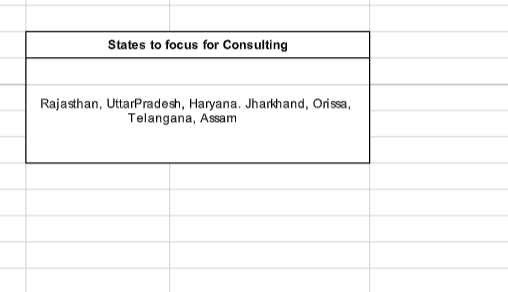

In [ ]:
df_events [df_events['state'] == 'Rajasthan']

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
2465088,1951755,1097318314,2016-04-30 23:54:54,76.395759,26.962700,Daosa,Rajasthan,2016,4,30,23,54,54
1914140,2492716,1097318314,2016-04-30 23:58:55,76.395759,26.962700,Daosa,Rajasthan,2016,4,30,23,58,55
2193298,1267708,1097318314,2016-04-30 23:59:44,76.395759,26.962700,Daosa,Rajasthan,2016,4,30,23,59,44
286236,399623,1716571720,2016-04-30 23:59:39,75.889024,26.967046,Jaipur,Rajasthan,2016,4,30,23,59,39
2553186,1630598,2037393362,2016-04-30 23:58:02,75.844364,27.003391,Jaipur,Rajasthan,2016,4,30,23,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311918,1121657,9851244622,2016-05-07 15:15:19,75.844033,26.999007,Jaipur,Rajasthan,2016,5,7,15,15,19
694118,2618059,9851244622,2016-05-07 15:13:12,75.844033,26.999007,Jaipur,Rajasthan,2016,5,7,15,13,12
2930792,2835012,9851244622,2016-05-07 17:20:51,75.844033,26.999007,Jaipur,Rajasthan,2016,5,7,17,20,51
2895744,2085165,9853763407,2016-05-07 15:44:58,74.477280,23.597960,Banswara,Rajasthan,2016,5,7,15,44,58


In [ ]:
df_events [df_events['state'] == 'Orissa']

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
429632,174596,2435667404,2016-04-30 23:57:54,85.923445,19.845977,Puri,Orissa,2016,4,30,23,57,54
2438199,1400258,4545578086,2016-04-30 23:57:36,82.593233,18.876563,Jaypur,Orissa,2016,4,30,23,57,36
993547,1985282,4595927020,2016-04-30 23:58:32,82.651699,18.907261,Jaypur,Orissa,2016,4,30,23,58,32
256705,328465,8979896049,2016-04-30 23:57:10,83.429524,19.274270,Rayagada,Orissa,2016,4,30,23,57,10
1730815,2590227,1013253755,2016-05-01 17:31:04,86.990307,21.588361,Baleshwar,Orissa,2016,5,1,17,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099263,1515298,9892807713,2016-05-07 16:09:09,85.904002,19.889025,Puri,Orissa,2016,5,7,16,9,9
1516640,2431432,9892807713,2016-05-07 15:37:39,85.904002,19.889025,Puri,Orissa,2016,5,7,15,37,39
1743009,1164242,9892807713,2016-05-07 22:31:50,85.904002,19.889025,Puri,Orissa,2016,5,7,22,31,50
3134373,1939477,9892807713,2016-05-07 16:08:40,85.904002,19.889025,Puri,Orissa,2016,5,7,16,8,40


In [ ]:
df_1006 = df_events[df_events['state'].isin(['Rajasthan','UttarPradesh','Haryana','Jharkhand','Orissa','Telangana','Assam'])]

In [ ]:
df_1006.to_csv('df_1006.csv')

In [ ]:
df_1006.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
2465088,1951755,1097318314,2016-04-30 23:54:54,76.395759,26.962700,Daosa,Rajasthan,2016,4,30,23,54,54
1914140,2492716,1097318314,2016-04-30 23:58:55,76.395759,26.962700,Daosa,Rajasthan,2016,4,30,23,58,55
2193298,1267708,1097318314,2016-04-30 23:59:44,76.395759,26.962700,Daosa,Rajasthan,2016,4,30,23,59,44
1348614,1627214,1402339699,2016-04-30 23:57:03,82.644774,25.477242,Bhadohi,UttarPradesh,2016,4,30,23,57,3
81498,1165770,1542962949,2016-04-30 23:59:03,77.539158,28.878061,Muradnagar,UttarPradesh,2016,4,30,23,59,3


In [ ]:
df_1006.shape

(370901, 13)

In [ ]:
df_1006['day'].unique()

array([30,  1,  2,  3,  4,  5,  6,  7], dtype=int32)

In [ ]:
df_1006['hour'].unique()

array([23, 15, 12, 10, 18,  0, 14, 11,  8, 13, 16,  6, 17,  7, 22, 21,  3,
        1,  5, 19, 20,  4,  2,  9], dtype=int32)

In [ ]:
df_grouped = df_1006[['event_id','state','day','month']]
df_grouped = df_grouped[df_grouped['month'] == 5]
df_grouped.head()

,event_id,state,day,month
1555401,3188847,Rajasthan,1,5
1693188,2263479,Jharkhand,1,5
2237834,600113,Jharkhand,1,5
2461297,2373082,Jharkhand,1,5
1489205,1353953,Jharkhand,1,5


In [ ]:
df_count_events = df_grouped.groupby(['state','day',])['event_id'].count().reset_index()
df_count_events = df_count_events.sort_values('day',ascending=True)
df_count_events.head()

,state,day,event_id
0,Assam,1,1595
21,Orissa,1,2228
28,Rajasthan,1,25486
42,UttarPradesh,1,13035
7,Haryana,1,2981


Rajasthan is the state with most number of events occuring in a day whereas Teleangana and Assam have the lowest number of events occuring in a day.

## **Creating a stacked bar chart**

In [ ]:
df_stack = df_1006.groupby(['state','day'])['event_id'].count().reset_index()
df_stack = df_stack.sort_values('event_id', ascending=False)
df_stack.head()

,state,day,event_id
36,Rajasthan,5,29645
37,Rajasthan,6,29594
34,Rajasthan,3,29069
35,Rajasthan,4,28475
33,Rajasthan,2,27093


In [ ]:
df_pivot = df_stack.pivot(index='day',columns='state',values='event_id')
df_pivot.head()

state,Assam,Haryana,Jharkhand,Orissa,Rajasthan,Telangana,UttarPradesh
day,,,,,,,
1,1595.0,2981.0,2461.0,2228.0,25486.0,1841.0,13035.0
2,1544.0,2849.0,2331.0,2106.0,27093.0,1826.0,12550.0
3,1831.0,2983.0,2698.0,2157.0,29069.0,1766.0,13543.0
4,1718.0,2959.0,2457.0,2295.0,28475.0,1773.0,13539.0
5,1734.0,3042.0,2744.0,2585.0,29645.0,1756.0,13866.0


In [ ]:
# Counting device ids
#Counting unique device_ids for each state
df_1006_device_id = df_1006[['device_id', 'state']]
df_1006_device_id = df_1006_device_id.drop_duplicates(subset=['device_id'])
df_1006_device_id.head()
df_1006_device_id = df_1006_device_id.groupby('state')['device_id'].size().reset_index(name='device_count')
df_1006_device_id = df_1006_device_id.sort_values('device_count',ascending=False)
df_1006_device_id.head()



,state,device_count
6,UttarPradesh,3660
4,Rajasthan,3093
5,Telangana,3045
1,Haryana,816
2,Jharkhand,739


In [ ]:
df_cities = df_1006[['city','state']]
df_cities = df_1006.groupby('state')['city'].nunique().reset_index()
df_cities = df_cities.sort_values('city', ascending=False)
df_cities



,state,city
6,UttarPradesh,115
4,Rajasthan,49
1,Haryana,26
2,Jharkhand,23
3,Orissa,21
0,Assam,15
5,Telangana,1


In [ ]:
df_cities_2 = df_1006[['city','state', 'device_id']]
df_cities_2 = df_1006.groupby('state')[['city', 'device_id']].nunique().reset_index()
df_cities_2 = df_cities_2.sort_values('city', ascending=False)
df_cities_2

,state,city,device_id
6,UttarPradesh,115,3660
4,Rajasthan,49,3093
1,Haryana,26,816
2,Jharkhand,23,739
3,Orissa,21,655
0,Assam,15,483
5,Telangana,1,3045


In [ ]:
df_1006_scatter = df_1006[['event_id','device_id','state','city']]
df_1006_scatter = df_1006_scatter.groupby(['state','city'])['event_id'].size().reset_index(name='event_count')
df_1006_scatter = df_1006_scatter.sort_values('event_count', ascending=False)
df_1006_scatter.head()

,state,city,event_count
108,Rajasthan,Jaipur,156965
134,Telangana,Hyderabad,12784
29,Haryana,Narnaul,2033
248,UttarPradesh,Varanasi,1633
200,UttarPradesh,Lakhnau,1629


In [ ]:
df_1006_cities = df_1006.groupby(['city','state','day'])['event_id'].size().reset_index(name='event_count')
df_1006_cities = df_1006_cities.sort_values('event_count', ascending=False)

df_1006_cities_7day = df_1006_cities.groupby(['city','state'])['event_count'].mean().reset_index(name='avg_event_count')
df_1006_cities_7day = df_1006_cities_7day.sort_values('avg_event_count', ascending=False)
df_1006_cities_7day['avg_event_count']=df_1006_cities_7day['avg_event_count'].astype(int).round(1)

df_1006_cities_7day = df_1006_cities_7day.head(10)

In [ ]:
df_1006_cities_7day

,city,state,avg_event_count
112,Jaipur,Rajasthan,19620
109,Hyderabad,Telangana,1826
180,Narnaul,Haryana,290
247,Varanasi,UttarPradesh,233
153,Lakhnau,UttarPradesh,232
30,Bari,Rajasthan,226
47,Bisalpur,UttarPradesh,222
57,Chandausi,UttarPradesh,214
236,Tanda,UttarPradesh,213
10,Aonla,UttarPradesh,204


# **Visualizations**

## **Number of devices held by  particular age group**

<ipython-input-95-b8cfced12acd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y= 'device_id', data = df_gender_grouped, palette='viridis')


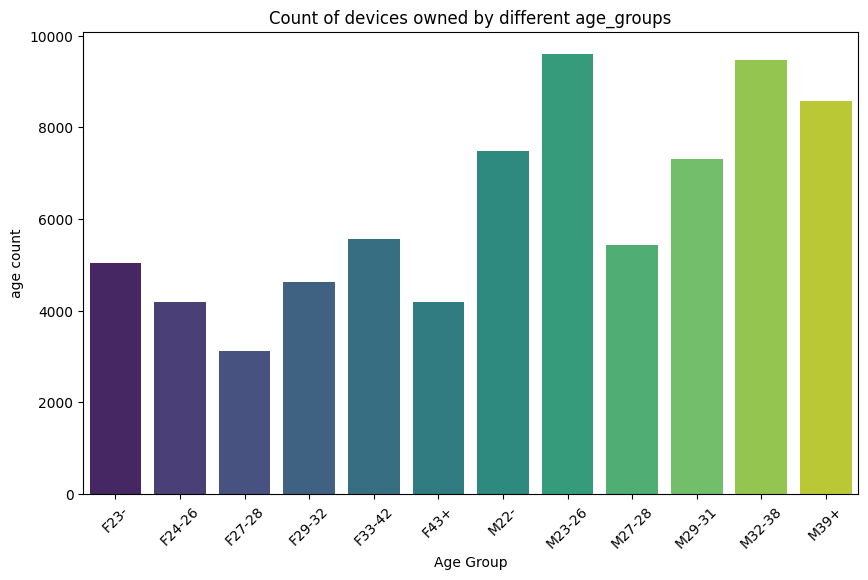

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))


sns.barplot(x='group', y= 'device_id', data = df_gender_grouped, palette='viridis')
plt.title('Count of devices owned by different age_groups')
plt.xlabel('Age Group')
plt.ylabel('age count')
plt.xticks(rotation=45)
plt.show()

plt.show()

**Male-Dominated Age Groups:**

The M23-26 age group has the highest count of device owners, followed closely by M32-38 and M39+.
In general, the male age groups from 22 and above tend to have higher device ownership compared to female
age groups.

**Female-Dominated Age Groups:**

The highest count among females is in the F33-42 group, followed by F23-.
The younger female age groups (e.g., F27-28) have noticeably fewer device owners compared to the male counterparts in those age ranges.
General Trends:

**Summary:**
Males in their mid-20s to late 30s dominate device ownership compared to their female counterparts.
For females, device ownership seems more evenly spread across the age groups, but still with generally lower counts than males.
Older Age Groups:

Both males and females in older age groups (M39+ and F43+) have fewer device owners than younger individuals, but males continue to outnumber females in device ownership as age increases.

<ipython-input-96-947c1ba4d39f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='count',data=df_grouped_age_male, palette='inferno')


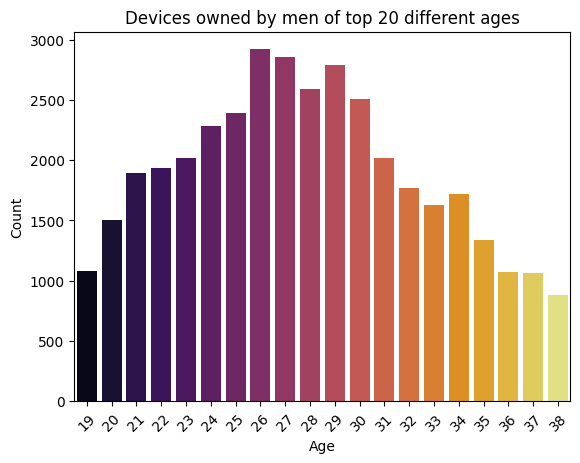

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='age', y='count',data=df_grouped_age_male, palette='inferno')
plt.title('Devices owned by men of top 20 different ages')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.figsize=(15,10)
plt.show()


Men in their mid to late 20s are the most likely to own devices.
Device ownership declines steadily after age 30, with older men (in their late 30s) owning fewer devices.
This data could be useful for targeting product marketing or understanding demographic technology usage trends.


## **Devices owned by Females of different ages**

<ipython-input-97-afd94ad473fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y= 'count', data=df_age_grouped_female, palette = 'magma')


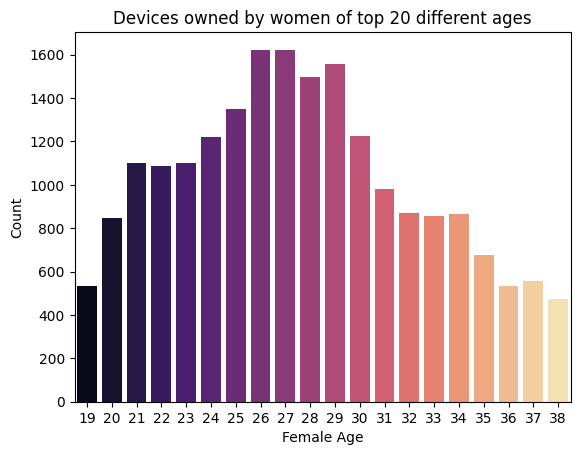

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='age', y= 'count', data=df_age_grouped_female, palette = 'magma')
plt.title('Devices owned by women of top 20 different ages')
plt.xlabel('Female Age')
plt.ylabel('Count')
plt.figsize = (10,6)
plt.show()



1. Peak Device Ownership: Women aged 26 to 28 have the highest device ownership.
2. Gradual Increase: Device ownership steadily increases from age 19 to 26.
3. Decline After Age 28: After age 28, device ownership starts to decline,
   becoming more pronounced after age 30.
4. Older Age Groups: Women above 35 have significantly lower device ownership
   compared to younger age groups.
5. This suggests that women in their late 20s are the most active in device
  ownership, with a noticeable drop-off in ownership as age increases.



## **Phones and Brand Study**

<ipython-input-98-e4c102d8a1e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='phone_brand', data=df_merged_group, palette='plasma', orient='h')


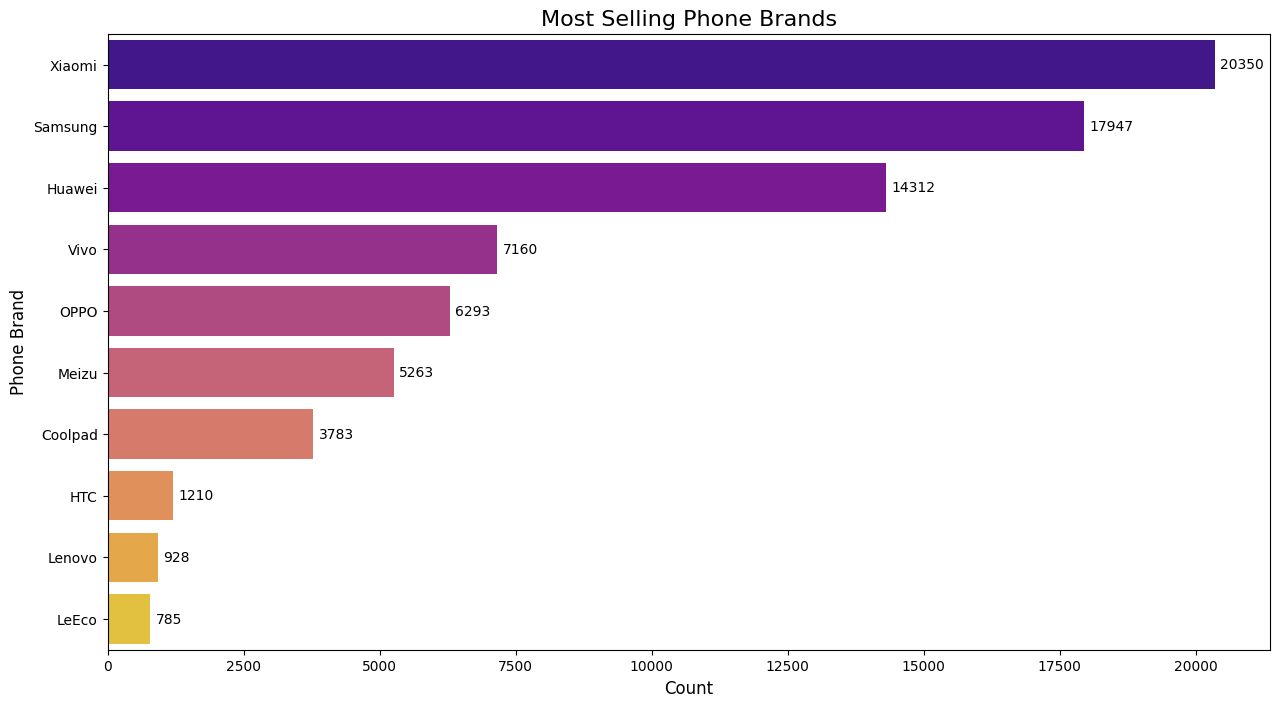

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15,8))

barplot = sns.barplot(x='count', y='phone_brand', data=df_merged_group, palette='plasma', orient='h')
plt.title('Most Selling Phone Brands', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Phone Brand', fontsize=12)

# Add text labels at the end of each bar
for index, value in enumerate(df_merged_group['count']):
    plt.text(value + 100, index, str(value), color='black', va='center')  # Adding 100 to position the text slightly beyond the bar

# Show the plot
plt.show()


1. Xiaomi is the top-selling brand with 19,212 units, followed by Samsung with
   16,966 units, and Huawei with 13,480 units.
2. Other notable brands include Vivo (6,731), OPPO (5,979), and Meizu (4,953).
   Coolpad, HTC, Lenovo, and LeEco have significantly lower sales, with LeEco being the lowest at 742 units.
This suggests that Xiaomi, Samsung, and Huawei dominate the phone market, while smaller brands capture a much smaller share.



# **Top Selling models for top 3 brands**

Text(0, 0.5, 'Device Model')

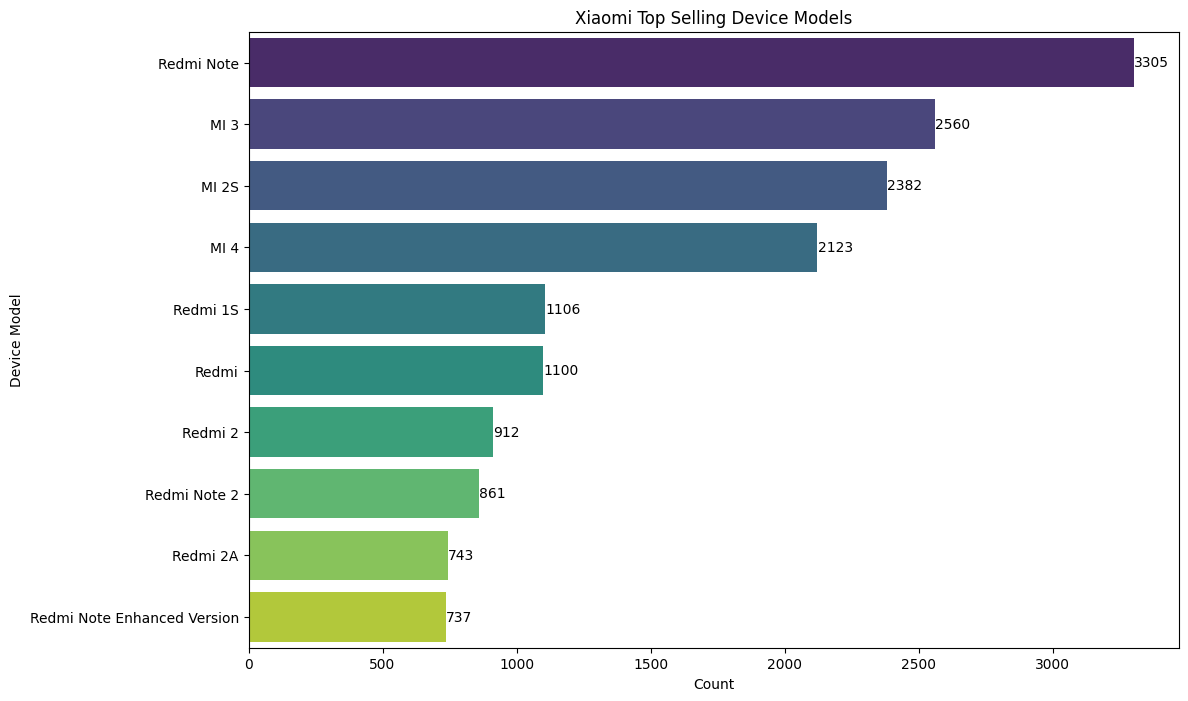

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create the bar plot with the 'viridis' palette and hue to avoid FutureWarning
bar_plot = sns.barplot(x=df_merged_xiaomi['count'], y=df_merged_xiaomi['device_model'],
                       hue=df_merged_xiaomi['device_model'], palette='viridis', dodge=False)

# Adding the count annotations to each bar
for index, value in enumerate(df_merged_xiaomi['count']):
    plt.text(value + 0.2, index, str(value), color='black', va="center")

# Set plot title and labels
plt.title('Xiaomi Top Selling Device Models')
plt.xlabel('Count')
plt.ylabel('Device Model')



The plot shows Xiaomi's top-selling device models ranked by their respective counts. The top models are:

1. Redmi Note with the highest count of 3305.
2. MI 3 comes second with 2560 units.
3. MI 2S with 2382 units.
4. MI 4 with 2123 units.
5. Other models like Redmi 1S, Redmi, and Redmi 2 follow with counts ranging  
   from 1100 to 912.

The remaining models have progressively lower counts, with the Redmi Note Enhanced Version at the bottom with 737 units.

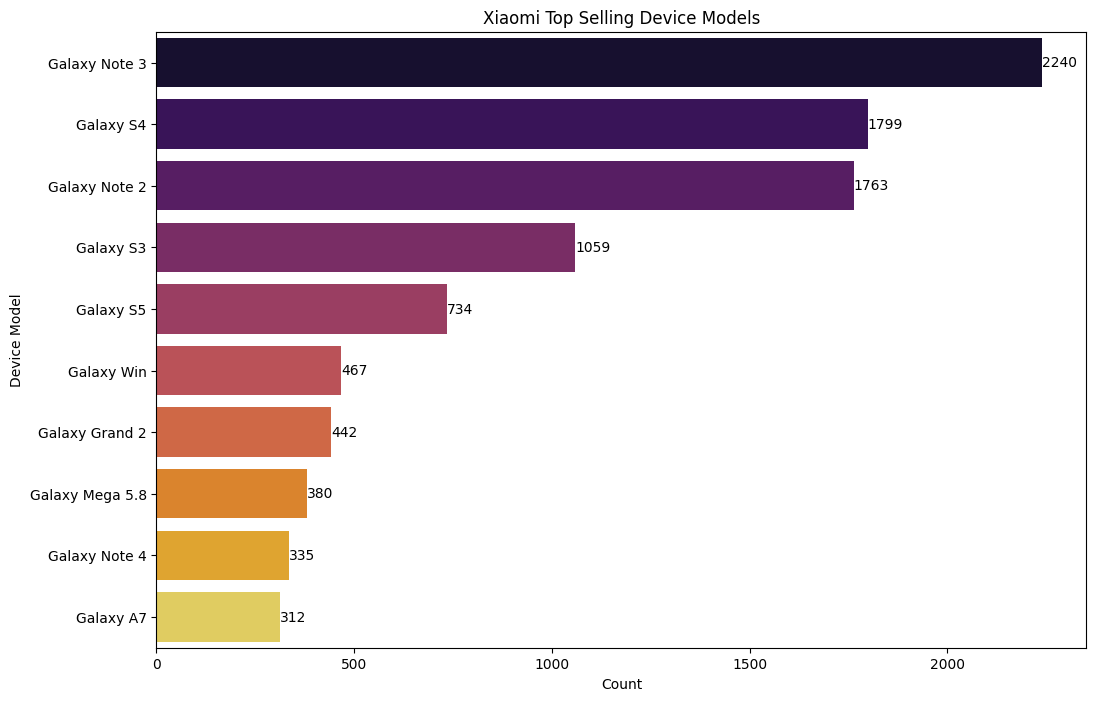

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create the bar plot with the 'inferno' palette
sns.barplot(x=df_merged_Samsung['count'], y=df_merged_Samsung['device_model'], hue=df_merged_Samsung['device_model'], palette='inferno', dodge=False)

# Set plot title and labels
plt.title('Xiaomi Top Selling Device Models')
plt.xlabel('Count')
plt.ylabel('Device Model')

# Adding the count annotations to each bar
for index, value in enumerate(df_merged_Samsung['count']):
    plt.text(value + 0.2, index, str(value), color='black', va="center")

# Show the plot
plt.show()


The plot shows the top-selling Galaxy device models ranked by their respective counts:

1. Galaxy Note 3 leads with 2240 units.
2. Galaxy S4 follows with 1799 units.
3. Galaxy Note 2 comes in third with 1763 units.
4. Galaxy S3 and Galaxy S5 have 1059 and 734 units respectively.
5. Other models like Galaxy Win, Galaxy Grand 2, and Galaxy Mega 5.8 show lower sales, ranging from 467 to 380 units.
6. The bottom two models are Galaxy Note 4 with 335 units and Galaxy A7 with 312 units.

<ipython-input-101-9fdfef985097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_merged_Huawei['count'], y=df_merged_Huawei['device_model'], palette='cividis')


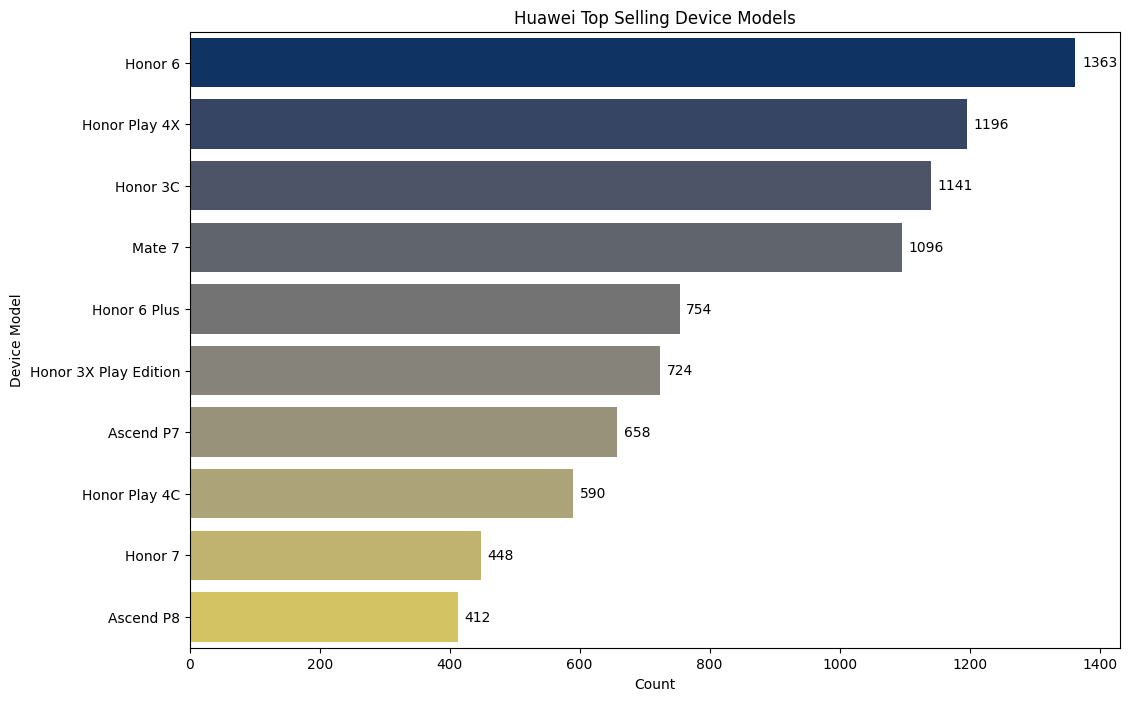

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create the bar plot with the 'inferno' palette
sns.barplot(x=df_merged_Huawei['count'], y=df_merged_Huawei['device_model'], palette='cividis')

# Set plot title and labels (correct the title for Huawei)
plt.title('Huawei Top Selling Device Models')
plt.xlabel('Count')
plt.ylabel('Device Model')

# Add the count annotations to each bar
for index, value in enumerate(df_merged_Huawei['count']):
    plt.text(value + 10, index, str(value), color='black', va="center")  # Adjusted position

# Show the plot
plt.show()



1.   **Xiaomi Top Selling Device Models:**

    The top-selling model is Redmi Note with 3,305 units sold, followed by MI 3 and MI 2S, selling 2,560 and 2,382 units respectively.
    Other popular models include MI 4 and Redmi 1S, with sales above 1,000 units.
    The lowest in the list is Redmi Note Enhanced Version with 737 units sold.
    Samsung Top Selling Device Models:

2. **Samsung Top Selling Device Models:**
    
    The top-seller is Galaxy Note 3 with 2,240 units sold.
    Galaxy S4 and Galaxy Note 2 follow with 1,799 and 1,763 units, respectively.
    Other models, such as Galaxy S3 and Galaxy S5, have moderate sales, while Galaxy A7 has the fewest with 312 units sold.
    
3. **Huawei Top Selling Device Models:**

    Honor 6 leads with 1,363 units sold.
    Honor Play 4X and Honor 3C follow closely with 1,196 and 1,141 units.
    Honor Play 4C and Ascend P8 have fewer sales, with the Ascend P8 being the lowest at 412 units.

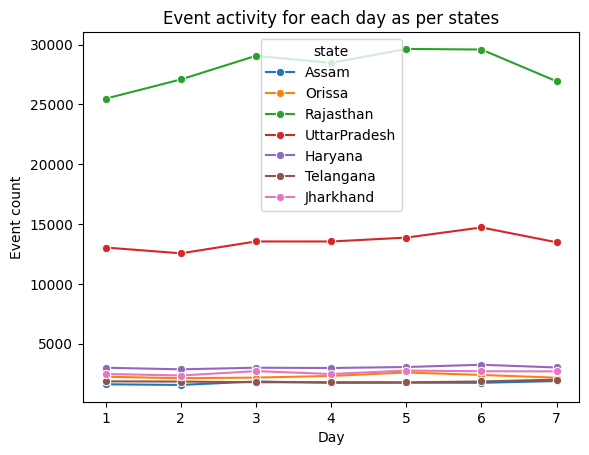

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the lineplot with markers
sns.lineplot(x='day', y='event_id', hue='state', data=df_count_events, marker='o')

# Set title and axis labels
plt.title('Event activity for each day as per states')
plt.xlabel('Day')
plt.ylabel('Event count')

# Set the y-axis ticks with intervals of 2000
#plt.yticks(range(0, int(df_count_events['event_id'].max()) + 2000, 2000))

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Display the plot
plt.show()


This graph shows the event activity of mobile usage for different states over a period of 7 days. Here's a summary of the activity:

1. **Rajasthan** has the highest event activity, consistently peaking around **28,000 - 30,000 events** daily. There is a slight dip on the 7th day but still maintains the lead.

2. **Uttar Pradesh** shows the second-highest level of activity, with values between **12,000 - 14,000 events** daily. The activity shows minor fluctuations but remains relatively stable over the 7-day period.

3. The **other states—Assam, Telangana, Jharkhand, Haryana**—have much lower event counts, consistently below **4,000 events each day**. Their trends are quite flat with minor fluctuations, indicating steady but much lower mobile event activity compared to Rajasthan and Uttar Pradesh.
In summary, Rajasthan dominates in mobile event activity, followed by Uttar Pradesh, while the other states show significantly lower levels of mobile activity.

In [ ]:
df_count_events_5_states = df_count_events[df_count_events['state'].isin(['Assam','Orissa','Haryana','Telangana','Jharkhand'])]
df_count_events_5_states.head()

,state,day,event_id
0,Assam,1,1595
21,Orissa,1,2228
7,Haryana,1,2981
35,Telangana,1,1841
14,Jharkhand,1,2461


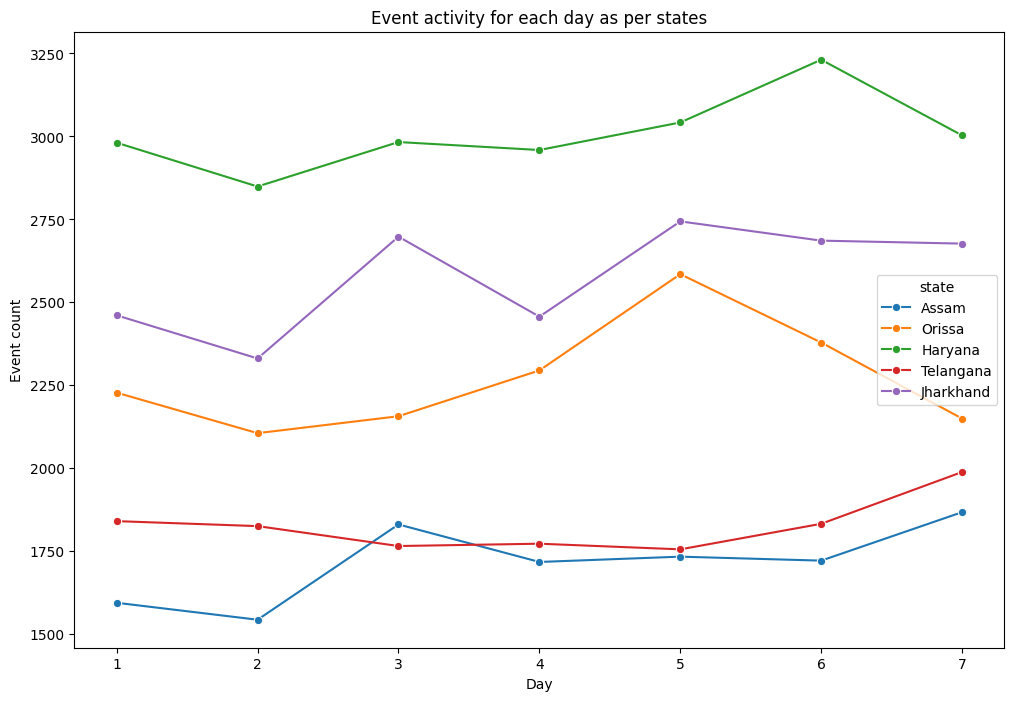

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(x='day', y='event_id', data=df_count_events_5_states, hue='state', marker='o', linestyle='-')

plt.title('Event activity for each day as per states')
plt.xlabel('Day')
plt.ylabel('Event count')

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Display the plot
plt.show()



1.**Haryana:**
    Consistently has the highest event count across all days.
    Shows a slight rise, peaking on day 7 with more than 3000 events.

2. **Jharkhand:**
    Event activity fluctuates, peaking on day 5 at around 2600 events, then decreasing.

3. **Orissa:**
    Event activity remains relatively stable with a slight rise after day 4.
    Peaks on day 6 at around 2500 events.

4. **Telangana**:
    Exhibits the lowest and flattest event activity, hovering around 1750 events daily.
    Shows minimal fluctuations with only slight increases toward days 6 and 7.

5. **Assam:**
    Also has low activity but shows a small rise on day 6 reaching just over 1800 events.

**General Summary:**
Haryana leads in event activity, while Telangana and Assam show lower, more consistent event counts.
Jharkhand and Orissa experience some variation, with notable peaks around days 5 and 6.
This plot illustrates how different states exhibit varying levels of event activity throughout the week, with Haryana maintaining a dominant position.







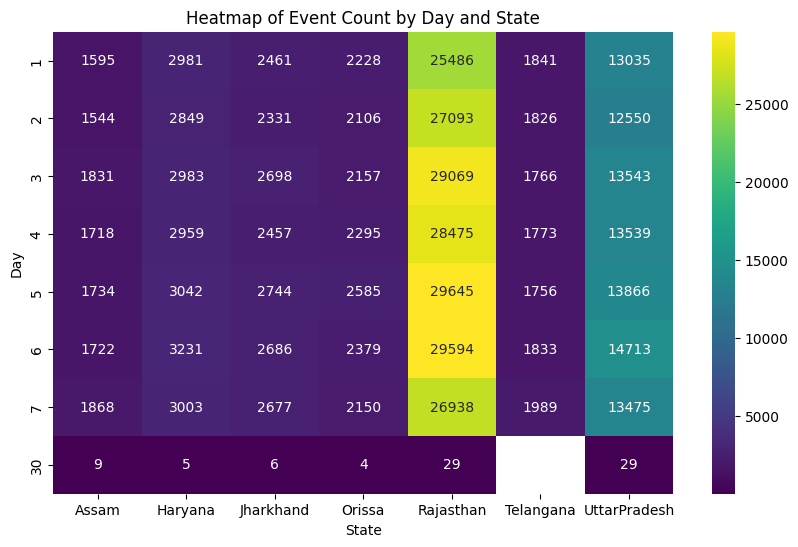

In [ ]:
# Disable scientific notation for large numbers
pd.set_option('display.float_format', lambda x: '%.f' % x)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, fmt="g", cmap='viridis')  # 'fmt="g"' to prevent scientific notation

# Add labels and title
plt.title('Heatmap of Event Count by Day and State')
plt.xlabel('State')
plt.ylabel('Day')

# Show the plot
plt.show()


This heatmap shows the event activity (event count) by day for different states over a 7-day period. Each cell represents the number of events that occurred in a particular state on a given day, with higher counts shown in brighter colors.

Summary of Event Activities:
1. **Rajasthan:**
    Rajasthan consistently has the highest event activity across all days, ranging from 25,486 to 29,654 events per day.
    Day 5 saw the peak activity with 29,654 events, while Day 1 had the lowest at 25,486 events.
    This high level of activity aligns with Rajasthan’s leading position in device count.

2. **Uttar Pradesh:**
    Uttar Pradesh also exhibits high event activity, consistently maintaining over 12,000 events daily, peaking on Day 6 with 14,713 events.
    This state's event activity is second only to Rajasthan.

3. **Orissa:**
    Orissa has moderate and consistent event activity, ranging from 2,106 to 2,585 events per day.
    Day 5 saw the peak activity with 2,585 events, while Day 2 had the lowest at 2,106 events.
    Event activity remains steady across the 7 days, with slight increases around Day 5.

3. **Telangana:**
    Telangana shows moderate event activity, hovering around 1,700 - 1,900 events per day.
    It has a peak of 1,989 events on Day 7, and its lowest was 1,756 events on Day 5.

4. **Haryana:**
    Haryana displays a steady number of events per day, around 2,800 - 3,300 events.
    The highest event count occurs on Day 6 with 3,231 events, while Day 2 records 2,849 events, its lowest.

5. **Jharkhand:**
    Jharkhand's event count fluctuates between 2,300 - 2,700 events per day.
    The highest activity is on Day 5 with 2,744 events, while the lowest is on Day 2 with 2,331 events.

6. **Assam:**
    Assam shows relatively low event activity compared to other states, with counts ranging from 1,544 to 1,868 events daily.
    Day 7 is Assam's peak day with 1,868 events, while Day 2 has the lowest at 1,544 events.



In [ ]:
df_1006_device_id

,state,device_count
6,UttarPradesh,3660
4,Rajasthan,3093
5,Telangana,3045
1,Haryana,816
2,Jharkhand,739
3,Orissa,655
0,Assam,483


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'UttarPradesh'),
  Text(1, 0, 'Rajasthan'),
  Text(2, 0, 'Telangana'),
  Text(3, 0, 'Haryana'),
  Text(4, 0, 'Jharkhand'),
  Text(5, 0, 'Orissa'),
  Text(6, 0, 'Assam')])

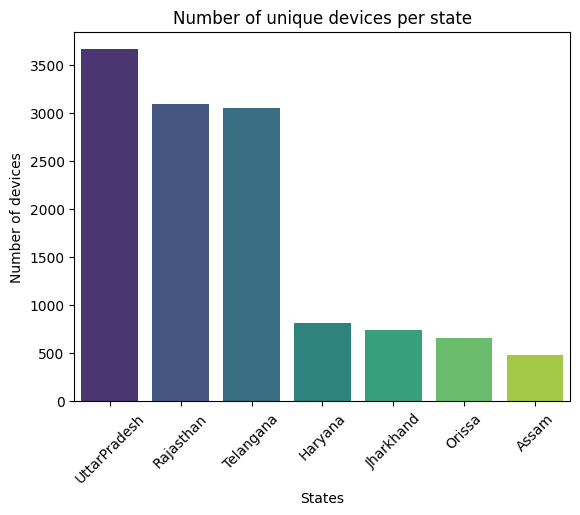

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='state', y='device_count', data=df_1006_device_id,hue= df_1006_device_id['state'],palette='viridis')
plt.title('Number of unique devices per state')
plt.xlabel('States')
plt.ylabel('Number of devices')
plt.xticks(rotation=45)

1. **Uttar Pradesh:**
Highest number of active devices: With 3,660 active devices, Uttar Pradesh leads in device count but comes second in event activity.
Event Activity: Ranges between 12,000 and 14,000 events daily, which is substantial but significantly lower than Rajasthan despite the higher device count.

2. **Rajasthan:**
Event Activity Leader: Rajasthan consistently shows the highest event activity, with 25,000 to 30,000 events per day.
Device Count: With 3,093 active devices, Rajasthan has fewer devices than Uttar Pradesh, but its users are much more engaged, with event activity twice as high as Uttar Pradesh.

3. **Orissa:**
    Device Count: Orissa has around 530 active devices, which is close to Jharkhand’s count but higher than Assam’s.
    Event Activity: Orissa shows moderate event activity, ranging from 2,100 to 2,500 events per day. The peak was on Day 5 with 2,585 events, showing it performs better than Assam in terms of both device count and engagement, but lower than Jharkhand and Haryana.

4. **Telangana:**
    Device Count: With 3,045 active devices, it’s close to Rajasthan in terms of device count.
    Lower Event Activity: Despite the high number of devices, Telangana has significantly lower event activity, between 1,700 and 1,900 events per day, which is only about one-seventh of Rajasthan’s activity.

5. **Haryana & Jharkhand:**
    Device Count: Both states have 700-800 active devices (Haryana: 816, Jharkhand: 739).
    Event Activity: Their event activity is relatively higher than their device count suggests, with 2,800 to 3,300 events per day, similar to Telangana despite fewer devices.

6. **Assam:**
  Lowest Device Count: Assam has the fewest active devices at 483, which is about half of Haryana's.
  Event Activity: Reflecting this, its event activity is also the lowest, with 1,500 to 1,800 events per day, about half of what Haryana and Jharkhand record.

**Key Insights:**
1. Rajasthan stands out as the leader in event activity, with users being significantly more active online despite having fewer devices than Uttar Pradesh.
2. Uttar Pradesh, despite having the most devices, sees only half the event activity of Rajasthan.
3. Telangana has a high number of devices, but low user engagement compared to Rajasthan and Uttar Pradesh.

4. Haryana and Jharkhand have relatively fewer devices but manage moderate event activity, comparable to Telangana.

5. Orissa has fewer devices than Telangana but manages to maintain moderate event activity, performing better than Assam and comparable to Jharkhand.

6. Assam, with the fewest devices, also has the lowest event activity, aligning proportionately with its device count.

  This analysis highlights the difference between the number of devices and actual online activity, with Rajasthan emerging as the most engaged state despite not having the highest number of devices.
  Rajasthan emerges as the most engaged state in terms of event activity, while Orissa, despite having fewer devices than many states, manages a moderate amount of online activity, indicating reasonable engagement compared to its device count.

In [ ]:
df_1006.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,year,month,day,hour,minutes,second
2465088,1951755,1097318314,2016-04-30 23:54:54,76,27,Daosa,Rajasthan,2016,4,30,23,54,54
1914140,2492716,1097318314,2016-04-30 23:58:55,76,27,Daosa,Rajasthan,2016,4,30,23,58,55
2193298,1267708,1097318314,2016-04-30 23:59:44,76,27,Daosa,Rajasthan,2016,4,30,23,59,44
1348614,1627214,1402339699,2016-04-30 23:57:03,83,25,Bhadohi,UttarPradesh,2016,4,30,23,57,3
81498,1165770,1542962949,2016-04-30 23:59:03,78,29,Muradnagar,UttarPradesh,2016,4,30,23,59,3


In [ ]:
df_1006_hr = df_1006[['event_id','state','hour','day']]
df_1006_hr = df_1006_hr.groupby(['state','hour'])['event_id'].size().reset_index(name='event_count')
df_1006_hr = df_1006_hr.sort_values('event_count', ascending=False)
df_1006_hr.head()

,state,hour,event_count
113,Rajasthan,17,12827
112,Rajasthan,16,12216
111,Rajasthan,15,12075
114,Rajasthan,18,11762
115,Rajasthan,19,10926


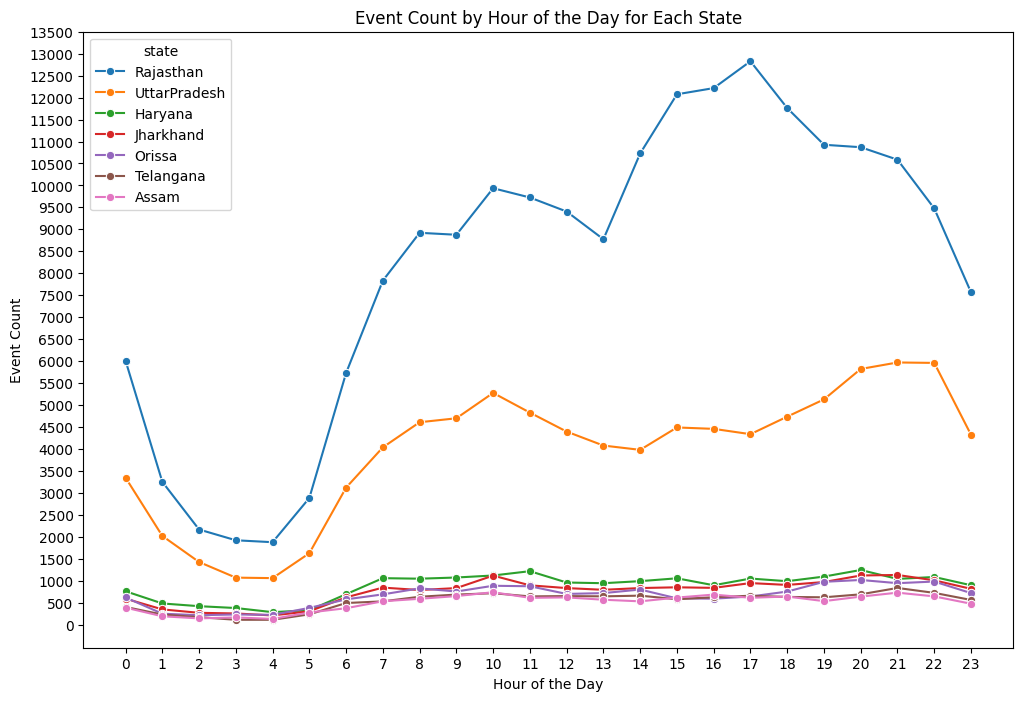

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(x='hour', y='event_count', data=df_1006_hr, hue='state', marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Count by Hour of the Day for Each State')

# Set x-ticks to show every hour
plt.xticks(range(0, 24))  # Assuming 'hour' ranges from 0 to 23
plt.yticks(range(0,14000,500))
# Display the plot
plt.show()


In [ ]:
df_1006_hr_4_states = df_1006_hr[df_1006_hr['state'].isin(['Haryana', 'Jharkhand','Orissa','Telangana','Assam'])]

This line plot shows the event count by hour of the day for various states, highlighting the trends in activity throughout a 24-hour period.

1. **Rajasthan:**
    Rajasthan dominates in terms of event activity.
    It has a peak activity of around 12,500 events at 17:00, followed by a gradual decline.
    The event count is lowest between 03:00 and 05:00.

2. **Uttar Pradesh:**
    Uttar Pradesh shows consistent but lower activity compared to Rajasthan.
    The peak activity occurs at 21:00 with around 4,500 events.
    The event count drops significantly between 02:00 and 05:00 but remains relatively steady throughout the rest of the day.

3.**Haryana, Jharkhand, Orissa, Telangana, and Assam:**
    These states exhibit relatively low and stable event activity throughout the day, with event counts around 500 to 1,000.
    There are no significant peaks or declines in these states, showing consistent, but low engagement over 24 hours.

**Key Insights:**
1. Rajasthan and Uttar Pradesh have distinct peaks during late afternoon and evening hours, indicating higher user activity during these times.

2. Other states (Haryana, Jharkhand, Orissa, Telangana, and Assam) have low and consistent event activity throughout the day.

3. The lowest activity for most states occurs in the early morning hours, around 02:00 to 05:00.

This analysis highlights Rajasthan and Uttar Pradesh as the most active states in terms of event activity, with clear peaks in user engagement during specific times of the day.

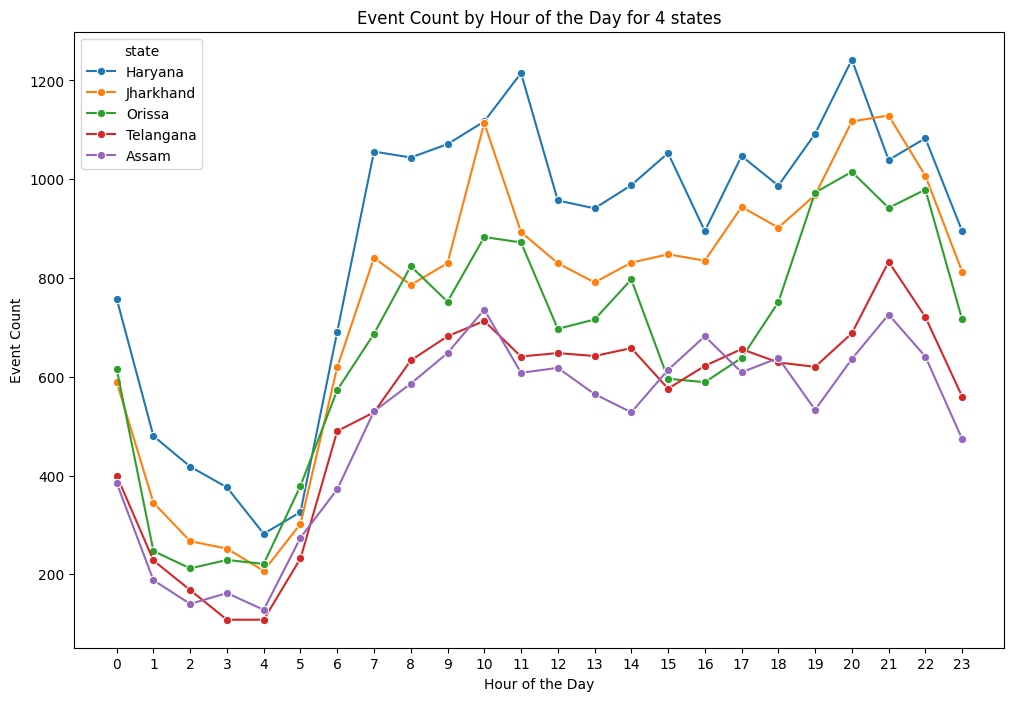

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(x='hour', y='event_count', data=df_1006_hr_4_states, hue='state', marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Count by Hour of the Day for 4 states')

# Set x-ticks to show every hour
plt.xticks(range(0, 24))  # Assuming 'hour' ranges from 0 to 23
#plt.yticks(range(0,14000,500))
# Display the plot
plt.show()


1. **Jharkhand:**
    Jharkhand has a similar pattern to Haryana, though the event counts are generally lower.
    Peaks around 6 AM, 10 AM, and again in the afternoon.
    
2. **Orissa:**
    Orissa has moderate activity throughout the day.
    Peaks are seen around 7 AM, 9 AM, and 3 PM.
    Event count is lower compared to Haryana and Jharkhand.

3.  **Telangana**
    Telangana shows a relatively consistent event count, with the largest peak occurring around 9 PM.
    The event count is more stable throughout the day compared to other states.

4.  **Assam:**
    Assam shows a consistent event count with no major peaks.
    The event count is lower compared to the other states, but it is relatively stable between 8 AM and 10 PM.

**General Observations:**
Early morning hours (around 5 AM) show lower activity across all states, with a sharp rise occurring around 6 to 8 AM.
Activity tends to stabilize in the late morning and early afternoon.
Some states, like Haryana and Jharkhand, show more prominent peaks, while states like Telangana and Assam have flatter patterns with fewer sharp changes in event counts.
This plot provides an overview of how different states exhibit varying levels of event activity throughout the day, with Haryana showing the most dynamic changes.


<ipython-input-132-6b7975acca15>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_event_count', y='city', data=df_1006_cities_7day, palette='viridis')


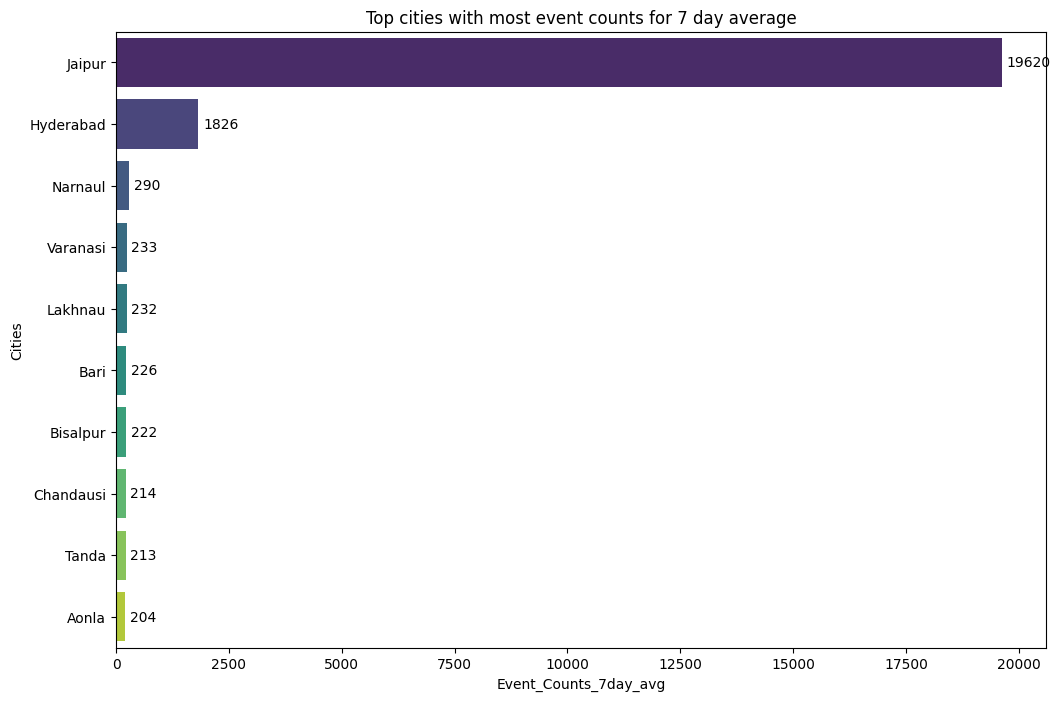

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating the bar plot
plt.figure(figsize=(12, 8))  # Set figure size before plotting
sns.barplot(x='avg_event_count', y='city', data=df_1006_cities_7day, palette='viridis')

# Adding the text labels to the bars
for index, value in enumerate(df_1006_cities_7day['avg_event_count']):
    plt.text(value + 100, index, str(value), color='black', va='center')  # Adding 100 to position the text slightly beyond the bar

# Set plot title and labels
plt.title('Top cities with most event counts for 7 day average')
plt.xlabel('Event_Counts_7day_avg')
plt.ylabel('Cities')

# Remove the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()


* The chart visualizes the top cities with the highest event counts over a 7-day average. Jaipur significantly leads with 19,620 events, dominating the chart with a large margin compared to the other cities. Hyderabad follows with 1,826 events, but the gap between Jaipur and the rest of the cities is immense. Cities like Narnaul (290), Varanasi (233), Lakhnaur (232), Bari (226), and others show considerably smaller event counts, hovering around 200-300. The color palette reflects varying event counts, but with the removal of the legend, only the numerical labels provide clarity on exact values. The chart highlights a sharp contrast between Jaipur's event activity and that of the other cities.

# **Final Insights**

## **1. Key Insights from the Dataset**

* Male-Dominated Age Groups:
    * Highest device ownership: M23-26 age group has the highest count.
    * Other key age groups: M32-38 and M39+ are the next highest.
    * Trend: Males in their mid-20s to late 30s dominate device ownership, with ownership declining after age 30.

* Female-Dominated Age Groups:
  * Highest device ownership: F33-42 age group followed by F23-.
  * Lower counts in younger female groups: F27-28 has noticeably fewer device
    owners than male counterparts.

* General Trends:
  * Males dominate in terms of device ownership, especially in the mid-20s to late 30s range.
  * Female device ownership is more evenly spread but lower overall than males.
Product and marketing suggestion: The product teams and marketers should focus their efforts on males aged 23-38 and females aged 23-42 for targeted campaigns.

## **2. Device Ownership Patterns by Age and Gender**
* Peak Device Ownership (Females): Women aged 26-28 have the highest device ownership.
* Gradual Increase: Device ownership rises steadily from age 19-26 for both genders.
* Decline After Age 28: Device ownership starts to decline, especially for women, becoming more pronounced after age 30.
* Older Women (35+): Significantly lower ownership compared to younger groups.

**Actionable Insights for Product & Marketing Teams:**
 * Focus marketing efforts on women in their late 20s (26-28) as they exhibit the highest device ownership.
 * Explore ways to engage older age groups (35+) with device promotions.

## **3. Top Device Brands & Sales Performance**
 * Xiaomi: Top-selling brand with 19,212 units, followed by Samsung (16,966) and Huawei (13,480).
 * Other brands: Vivo (6,731), OPPO (5,979), and Meizu (4,953) hold smaller market shares.
 * Lesser-known brands: Coolpad, HTC, Lenovo, and LeEco have much lower sales, with LeEco being the lowest (742 units).

**Product and Marketing Implications:**
* Focus promotional campaigns on popular brands like Xiaomi, Samsung, and Huawei.
* For lower-selling brands, explore exclusive deals or promotions to boost sales.


## **4. Device Model Breakdown**
* Xiaomi: Top-Selling Models:
Redmi Note leads with 3305 units, followed by MI 3 (2560), and MI 2S (2382).

* Samsung Top-Selling Models:
Galaxy Note 3 (2240), followed by Galaxy S4 (1799), and Galaxy Note 2 (1763).

* Huawei Top-Selling Models:
Honor 6 tops with 1363 units, followed by Honor Play 4X and Honor 3C.

* **Strategic Recommendations:**
Focus on promoting top-selling models (e.g., Redmi Note, Galaxy Note 3, and Honor 6).
Explore possible inventory reductions or promotions for lesser-selling models.

## **5. Mobile Event Activity by Region**
* High Activity States:
  * Rajasthan and Uttar Pradesh lead in mobile event activity, with Rajasthan dominating at 25,000 - 30,000 events per day.
  * Uttar Pradesh follows with 12,000 - 14,000 events per day.

* Moderate Activity States:
 * Orissa and Haryana consistently record 2,100 - 3,300 events per day.

* Low Activity States:
 * Telangana and Assam show the lowest activity with 1,500 - 1,900 events per day.
* **Marketing & Product Implications:**
 * Focus on Rajasthan and Uttar Pradesh for high-engagement campaigns and product launches.
 * For lower-activity states like Telangana and Assam, consider tailored campaigns to drive engagement.

## **6. Device Count & Event Activity Relationship**

* Device Count Leaders:
 * Uttar Pradesh leads with 3,660 active devices, followed by Rajasthan (3,093 devices), though Rajasthan sees twice the event activity despite having fewer devices.

* Moderate Device Counts:
 * Orissa and Haryana have moderate counts (530-800 devices) but show strong event activity compared to their device count.

* Low Device Count States:
 * Assam has the fewest devices (483), with corresponding low event activity.

* **Business Recommendations:**
 * Rajasthan is a key market due to high engagement; launch new products and services here.
 * Uttar Pradesh has potential for greater engagement; focus on increasing user interaction.

## **7. Time-Based Event Activity**

* Peak Times:
 * Rajasthan peaks at 17:00 with 12,500 events.
 * Uttar Pradesh peaks at 21:00 with 4,500 events.

* Low Activity Times:
 * Early morning hours (02:00 to 05:00) show the lowest activity across all states.

* **Strategic Action:**
 * Schedule campaigns and promotions for the late afternoon and evening hours to maximize user engagement.
 * Leverage low activity times for system maintenance or updates to minimize disruption.

## **9. City-Based Event Activity**
  * The event activity data reveals significant disparities between cities,     with Jaipur being a clear outlier. This could indicate Jaipur's heightened digital engagement or a larger user base compared to other cities.
  * For marketers, this data suggests prioritizing Jaipur for high-intensity campaigns, while cities with moderate event counts like Hyderabad and Narnaul should be considered for more tailored, engagement-driven strategies.
  * The significant drop-off in event counts across the remaining cities also highlights opportunities for increasing engagement in lower-performing areas through targeted promotions or local initiatives.

## **10. General Summary of Findings**
 * Rajasthan emerges as the most engaged state in terms of both device activity and event counts.
 * Uttar Pradesh, despite having the highest number of devices, lags behind in user engagement compared to Rajasthan.
 * States like Orissa and Jharkhand show strong engagement relative to their device counts, indicating room for further growth in user interaction.

* Next Steps:
 * Leverage high-engagement states for new product launches and promotional campaigns.
 * Explore ways to improve engagement in lower-performing states like Telangana and Assam.

## **Final Conclusion:**
   * The data provides valuable and actionable insights across various dimensions, from device ownership patterns by age and gender to brand performance and regional user activity. For Accredian Telecom, several key opportunities emerge:

**Demographic Focus:**

  * Prioritizing males aged 23-38 and females aged 23-42 for targeted campaigns can maximize engagement, as these groups represent the highest device ownership.
  Special emphasis should be placed on women in their late 20s (26-28), who exhibit peak ownership, and older age groups (35+) can be engaged with tailored promotions.

**Brand & Product Strategy:**

 * The top-selling brands—Xiaomi, Samsung, and Huawei—should be central to marketing and sales strategies. Promotions for these brands can further capitalize on their market dominance.
 * For lower-performing brands, exclusive deals or promotions could drive increased sales.

**Regional Focus:**
 * Rajasthan stands out as the most engaged state, making it a critical target for high-intensity product launches and marketing campaigns. Despite having fewer active devices than Uttar Pradesh, Rajasthan's higher engagement levels suggest greater market potential.
 * In lower-activity regions like Telangana and Assam, targeted campaigns and localized strategies can help increase user engagement and market penetration.

**City-Level Insights:**
 * Jaipur emerges as a major hub for mobile event activity, outpacing other cities by a wide margin. Focusing marketing resources on Jaipur will yield significant returns.
 * Meanwhile, cities like Hyderabad and Narnaul, which display moderate activity, could benefit from more personalized, engagement-driven strategies, leaving room to tap into their potential.

**Timing for Campaigns:**
* Peak user engagement times—late afternoon and evening—should be prioritized for promotional campaigns. Early morning hours present an ideal opportunity for system updates or low-impact activities.
* By focusing on high-engagement states, leveraging top-selling brands, and targeting key demographics, Accredian Telecom can drive substantial growth. Additionally, there is room to improve engagement in lower-performing regions through localized marketing efforts, creating a well-rounded strategy for sustained market expansion.